# 라이브러리 로드

In [1]:
# 필수 라이브러리 
!pip install --upgrade joblib==1.1.0
!pip install --upgrade scikit-learn==1.1.3
!pip install mglearn

# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 5.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:

In [2]:
import logging

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [3]:
import mglearn

from sklearn.model_selection import train_test_split 

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
# import matplotlib.font_manager as fm
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# Clustering
> 클러스터링은 비지도 학습방법이므로 label(정답)이 존재하지 않는 상태에서 학습을 통해 비슷한 개체끼리 그룹으로 묶는다.   
> 만약 label이 존재하면서 그룹으로 나눈다면 그것은 지도학습의 분류(Classification) 모델이다. 

## K-means

- K개의 랜덤한 중심점으로 부터 가까운 데이터들을 묶는 군집화 기법
- 평균을 사용함에 따라 이상치에 민감
- 거리를 재기 때문에 스케일링 필수
- 초기 중심에 민감
- K-means++
    - 초기 중심점 선정의 어려움을 해결하기 위한 방법
- 주요 파라미터
    - n_clusters : 군집수
    - init : 기본값이 k-means++

### 알고리즘 작동방식

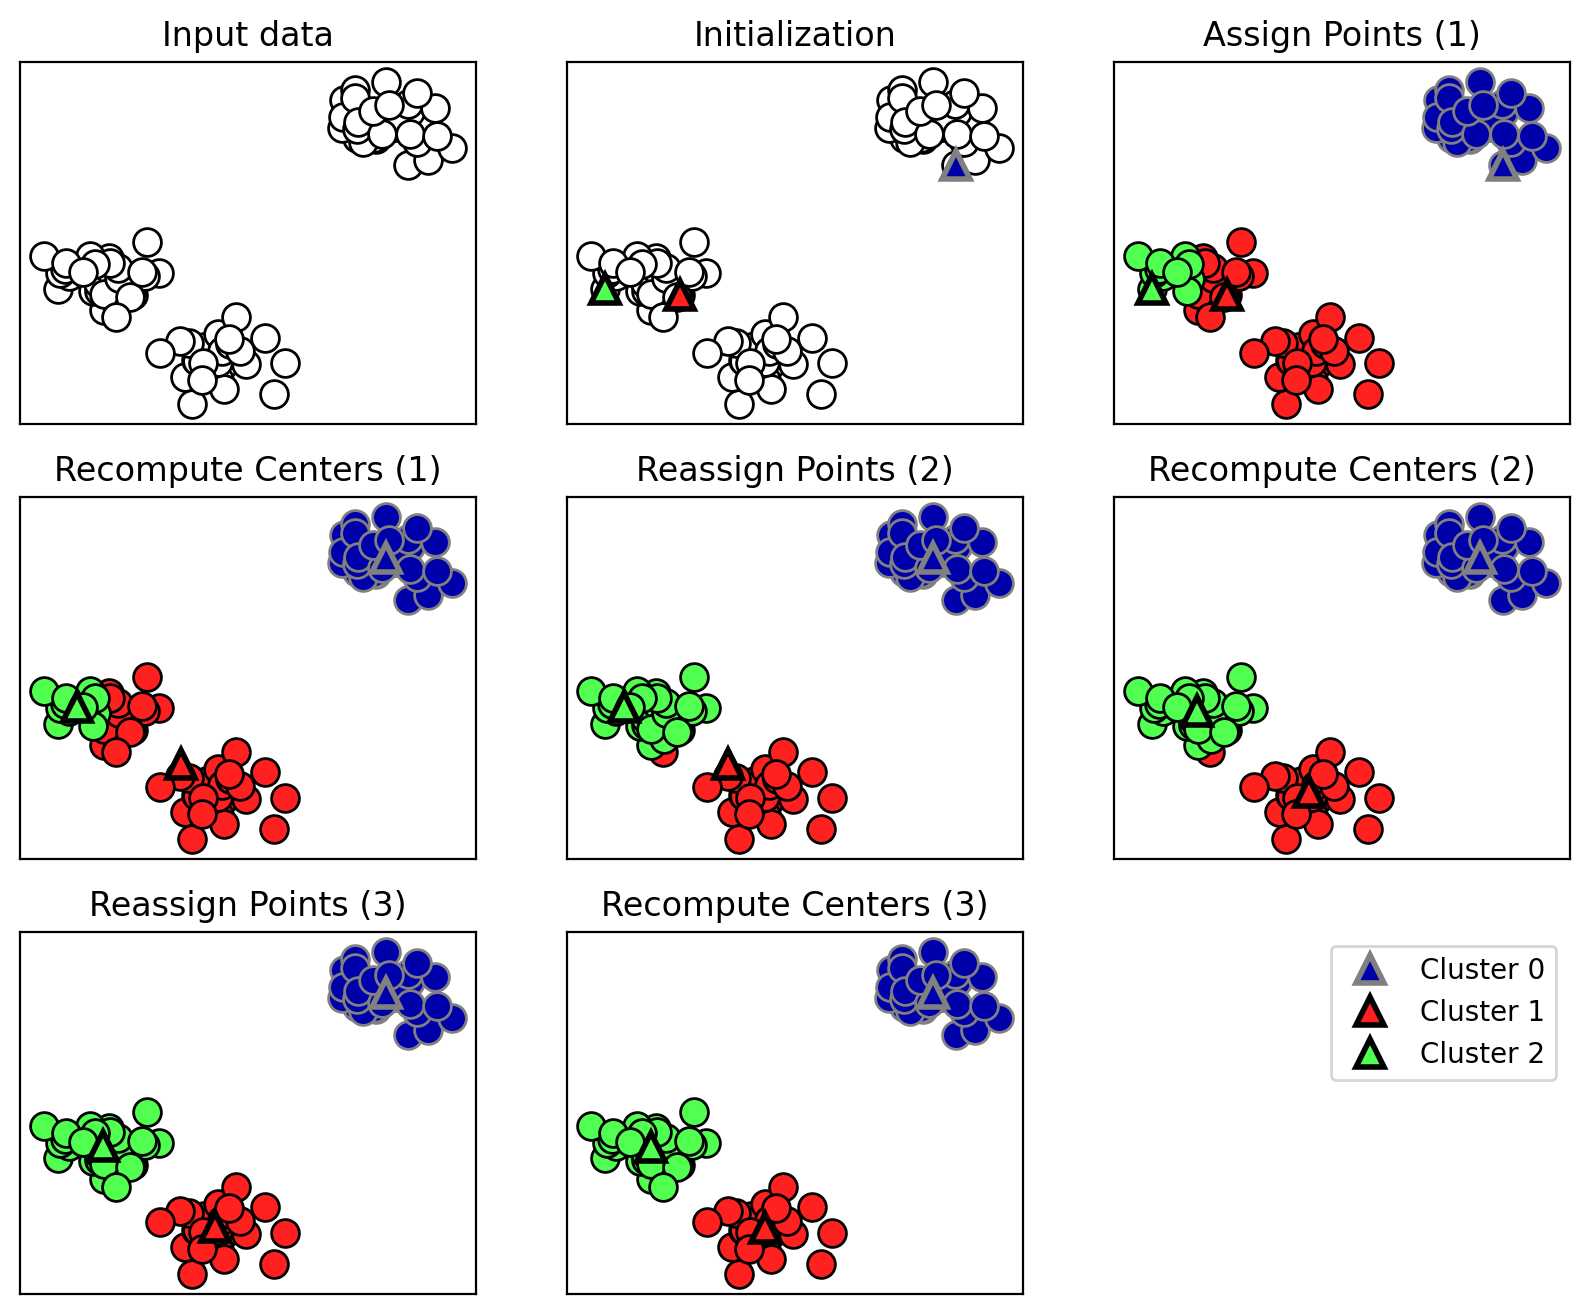

In [5]:
mglearn.plots.plot_kmeans_algorithm()

상기 그래프는 K-means의 알고리즘 작동방식을 나타내었습니다.
1. 랜덤으로 중심 초기화(Initialization)
2. 포인트 할당(Assign Points)
> 데이터 포인트를 가장 가까운 클러스터 중심으로 할당
3. 중심 재계산(Recompute Centers)
> 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심 재정의
4. 포인트 변화가 없을 때까지 2번,3번 반복

### 모델 학습

In [6]:
from sklearn.datasets import make_blobs 

# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)
X.shape, y.shape

((100, 2), (100,))

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)

KMeans(n_clusters=3)

In [8]:
# 학습한 라벨 확인
kmeans.labels_

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

In [9]:
# 새로운(?) 데이터 예측하기
kmeans.predict(X)

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

In [10]:
y # 실제 라벨 확인

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

### 모델 결과 분석

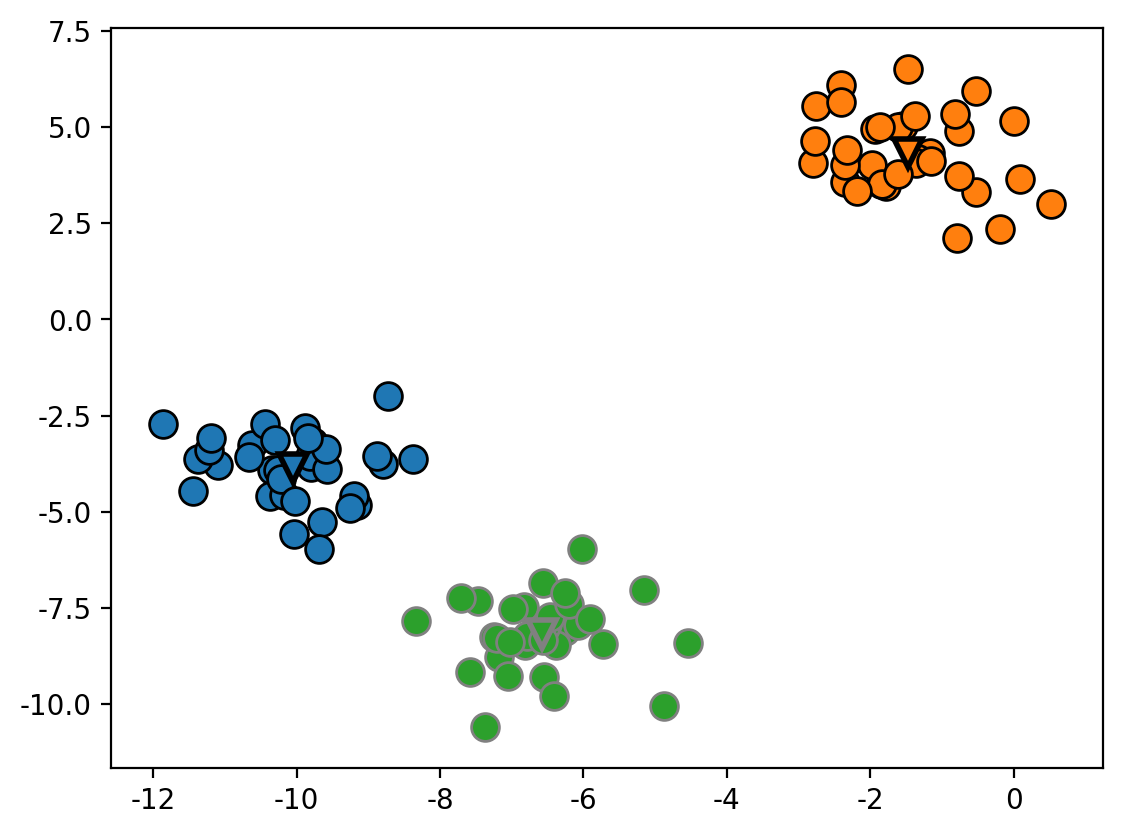

In [11]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
    [0,1,2], markers='v', markeredgewidth=2
)

클러스터 수를 줄이거나 늘리거나

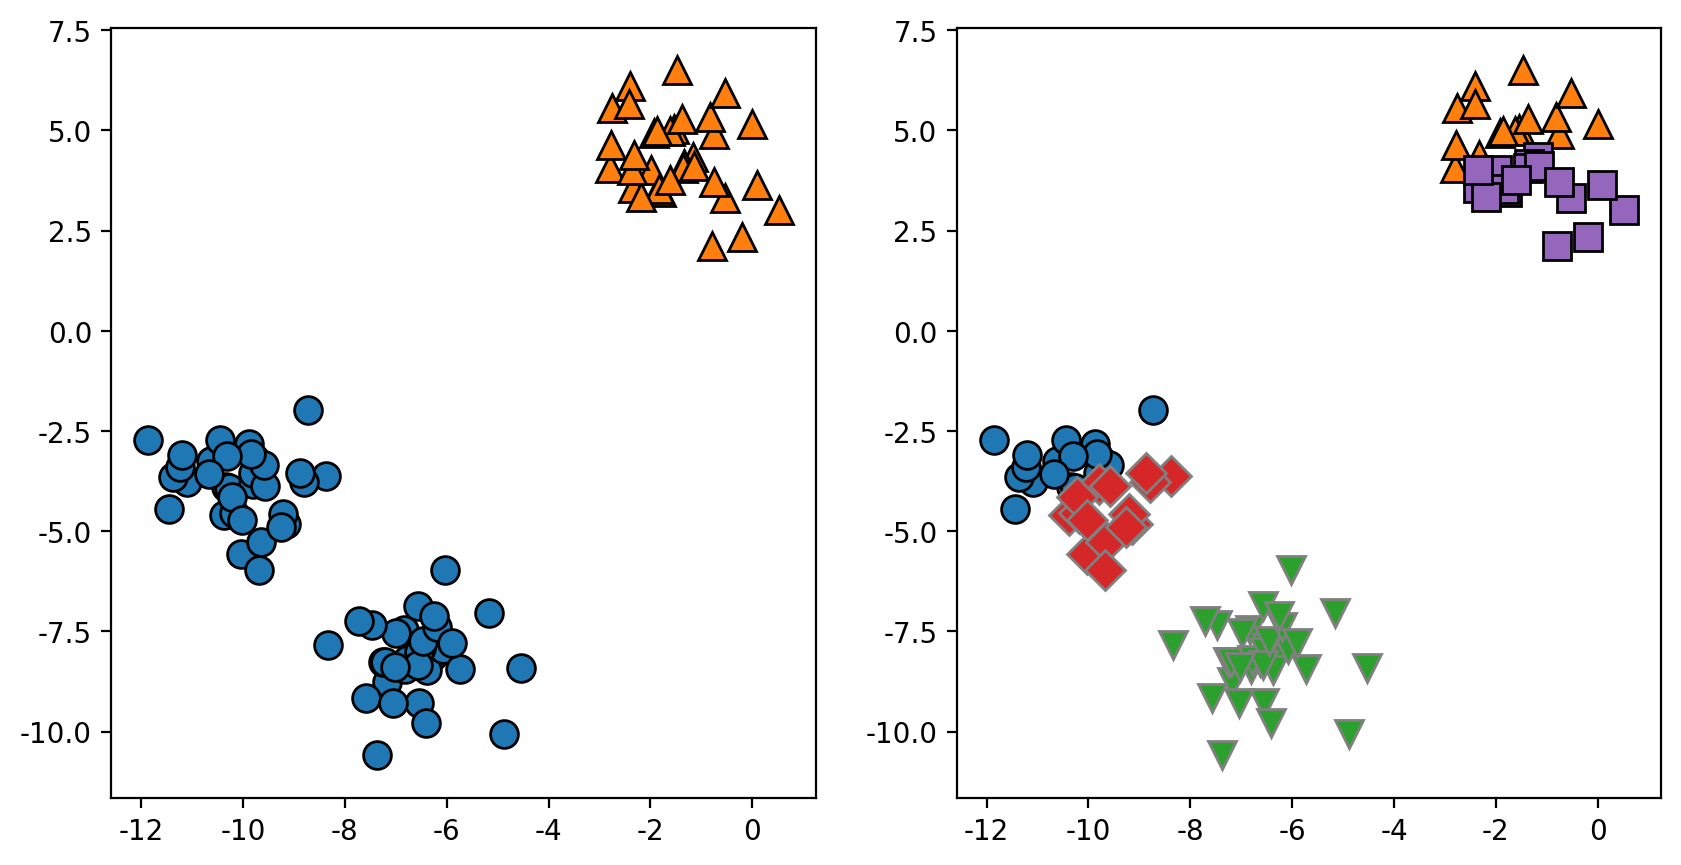

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# 2개로 줄이자
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, ax=axes[0])

# 5개로 늘리자
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, ax=axes[1])

### k-means 실패하는 경우
> 각 클러스터를 정의하는 것이 중심 하나뿐임으로 클러스터는 둥근 형태이면서 데이터가 밀집되어 있어야 효과가 있습니다.

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  func(*args

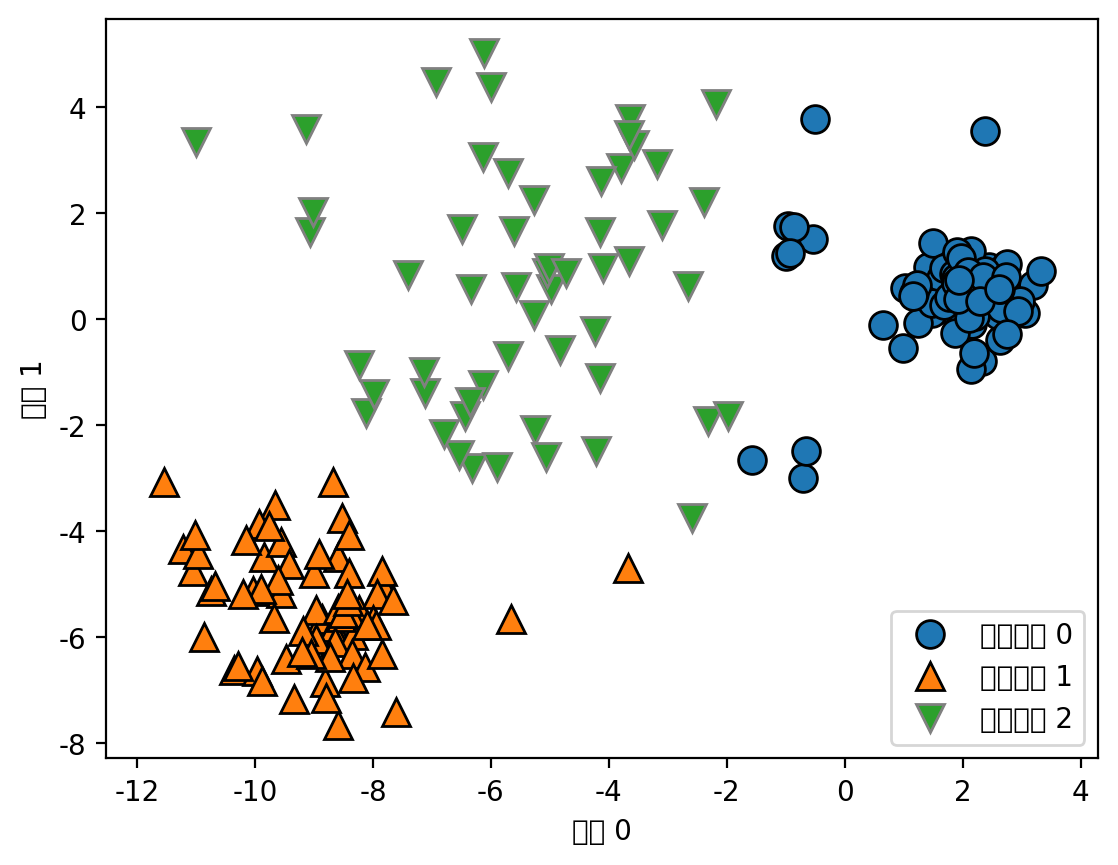

In [13]:
# 밀집되지 않은 데이터
x_data, y_data = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170) 
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_data)

mglearn.discrete_scatter(x_data[:,0], x_data[:,1], kmeans.labels_)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best') 
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


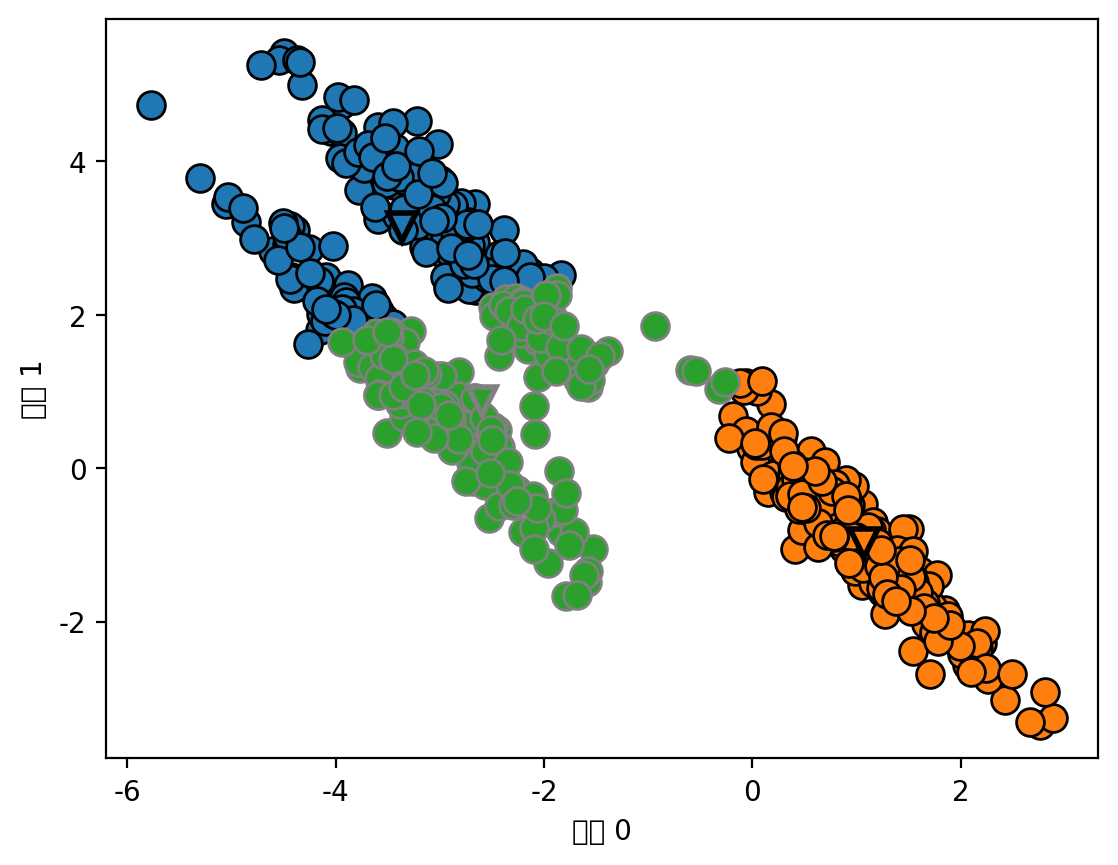

In [14]:
# 둥근 형태가 아닌 데이터
x_data, y_data = make_blobs(random_state=170, n_samples=600) # 무작위 클러스터 데이터 생성

rng = np.random.RandomState(74)
transformation = rng.normal(size=(2,2)) 
x_data = np.dot(x_data, transformation) # 데이터를 길죽하게 변경

kmeans = KMeans(n_clusters=3).fit(x_data) 

mglearn.discrete_scatter(x_data[:,0], x_data[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
    [0,1,2], markers='v', markeredgewidth=2
)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

## [군집 타당성 평가](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)
> 클러스터링은 정답이 없기 때문에 지도학습에서 사용하는 Accuracy 등의 지표로 평가할 수 없다. 아래 예에서 볼 수 있듯 최적의 군집 개수를 정답 없이 알아내기란 쉽지 않다.  

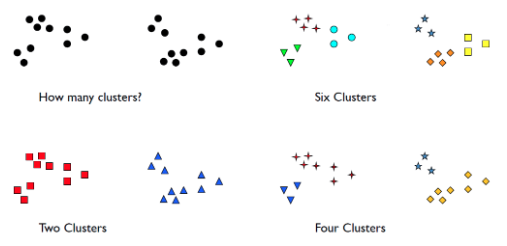

그렇다고 해서 클러스터링을 평가할 수 있는 방법이 아주 없는 것은 아니다. 군집을 만든 결과가 얼마나 유용한지 따지는 군집타당성지표(Clustering Validity Index)가 있기 때문이다. 아래 그림과 같이 (1) 군집 간 거리 (2) 군집의 지름 (3) 군집의 분산 등을 고려한다. 쉽게 말해 아래와 같다.
- 군집 간 분산(inter-cluster variance) 최대화
- 군집 내 분산(inner-cluster variance) 최소화 


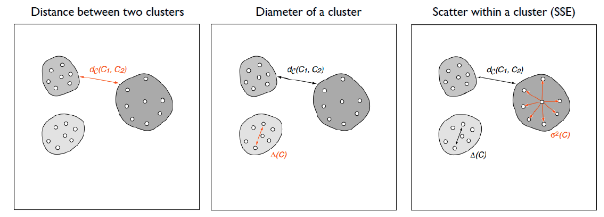

### 손글씨 데이터 로드

In [15]:
SEED = 42

In [16]:
from sklearn.datasets import load_digits

digits = load_digits()
x = digits.data / 255
y = digits.target
x.shape ,y.shape

((1797, 64), (1797,))

In [17]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
np.random.seed(SEED)
idx = np.arange(x.shape[0])
np.random.shuffle(idx)
x = x[idx]
y = y[idx]
x.shape ,y.shape

((1797, 64), (1797,))

In [19]:
idx = np.arange(x.shape[0])
idx[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
np.random.shuffle(idx)
idx[:10]

array([1407,  411,  802,  550, 1546,  554,  810,  924, 1068,  270])

In [21]:
y[:10]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [22]:
kmeans = KMeans(n_clusters=10,random_state=SEED)
kmeans.fit(x)

KMeans(n_clusters=10, random_state=42)

### 사전에 정의된 그룹이 있는 경우

- homogeneity
> 각 군집(예측값)이 동일한 클래스(실제값)로 구성되어있는 정도

In [23]:
from sklearn.metrics import homogeneity_score

homogeneity_score(y,kmeans.labels_)

0.737996379571194

- completeness
> 각 클래스(실제값)에 대하여 동일한 군집(예측값)으로 구성되어 있는 정도

In [24]:
from sklearn.metrics import completeness_score

completeness_score(y,kmeans.labels_)

0.74602699054445

- v-measure
> homogeneity와 completeness 조화평균

In [25]:
from sklearn.metrics import v_measure_score

completeness_score(y, kmeans.labels_)

0.74602699054445

### 사전에 정의된 그룹이 없는 경우

- silhouette coefficient(실루엣 계수
)
  - 밀집된 클러스터에는 좋지만, 모양이 복잡할 때는 평가가 잘 들어맞지 않다.
  - 군집내의 거리는 짧을수록, 군집간의 거리는 길수록 좋은 군집화 이다. 이 부분을 평가하기 위한 지표
  - -1 ~ 1 의 값을 가진다.
    - 1에 가까울 수록 명확하게 군집화 됨을 의미
    - 0에 가까울 수록 군집간의 거리가 가까워 진다는 것을 의미
    - 음수일 경우 잘못된 방식으로 군집화 되었다는 의미

In [26]:
from sklearn.metrics import silhouette_score

silhouette_score(x, kmeans.labels_)

0.18226082805532845

## [Overview of Clustering methods](https://scikit-learn.org/stable/modules/clustering.html)

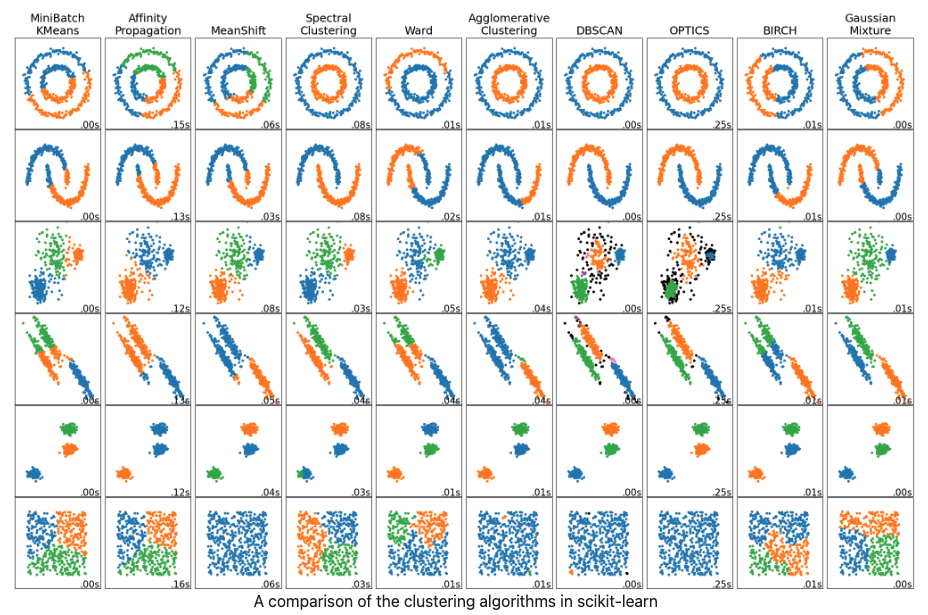

In [27]:
def print_score(x,y,pred):
    print(f"homogeneity: {homogeneity_score(y,pred)}")
    print(f"completeness: {completeness_score(y,pred)}")
    print(f"v_measure: {v_measure_score(y,pred)}")
    print('-'*50)
    print(f"silhouette: {silhouette_score(x,pred)}")

### MiniBatchKMeans
  - mini-batch 개수만큼 무작위로 분리하여 K-means 군집화를 한다.
  - 속도가 훨씬 빠르다.

In [28]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=10,random_state=SEED,batch_size=512 ).fit(x)
print_score(x,y,kmeans.labels_)

homogeneity: 0.7129288903522628
completeness: 0.7288991277425318
v_measure: 0.7208255628252749
--------------------------------------------------
silhouette: 0.18472538252636414


### Agglomerative Clustering(병합 군집)
> 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합치는 알고리즘이다.

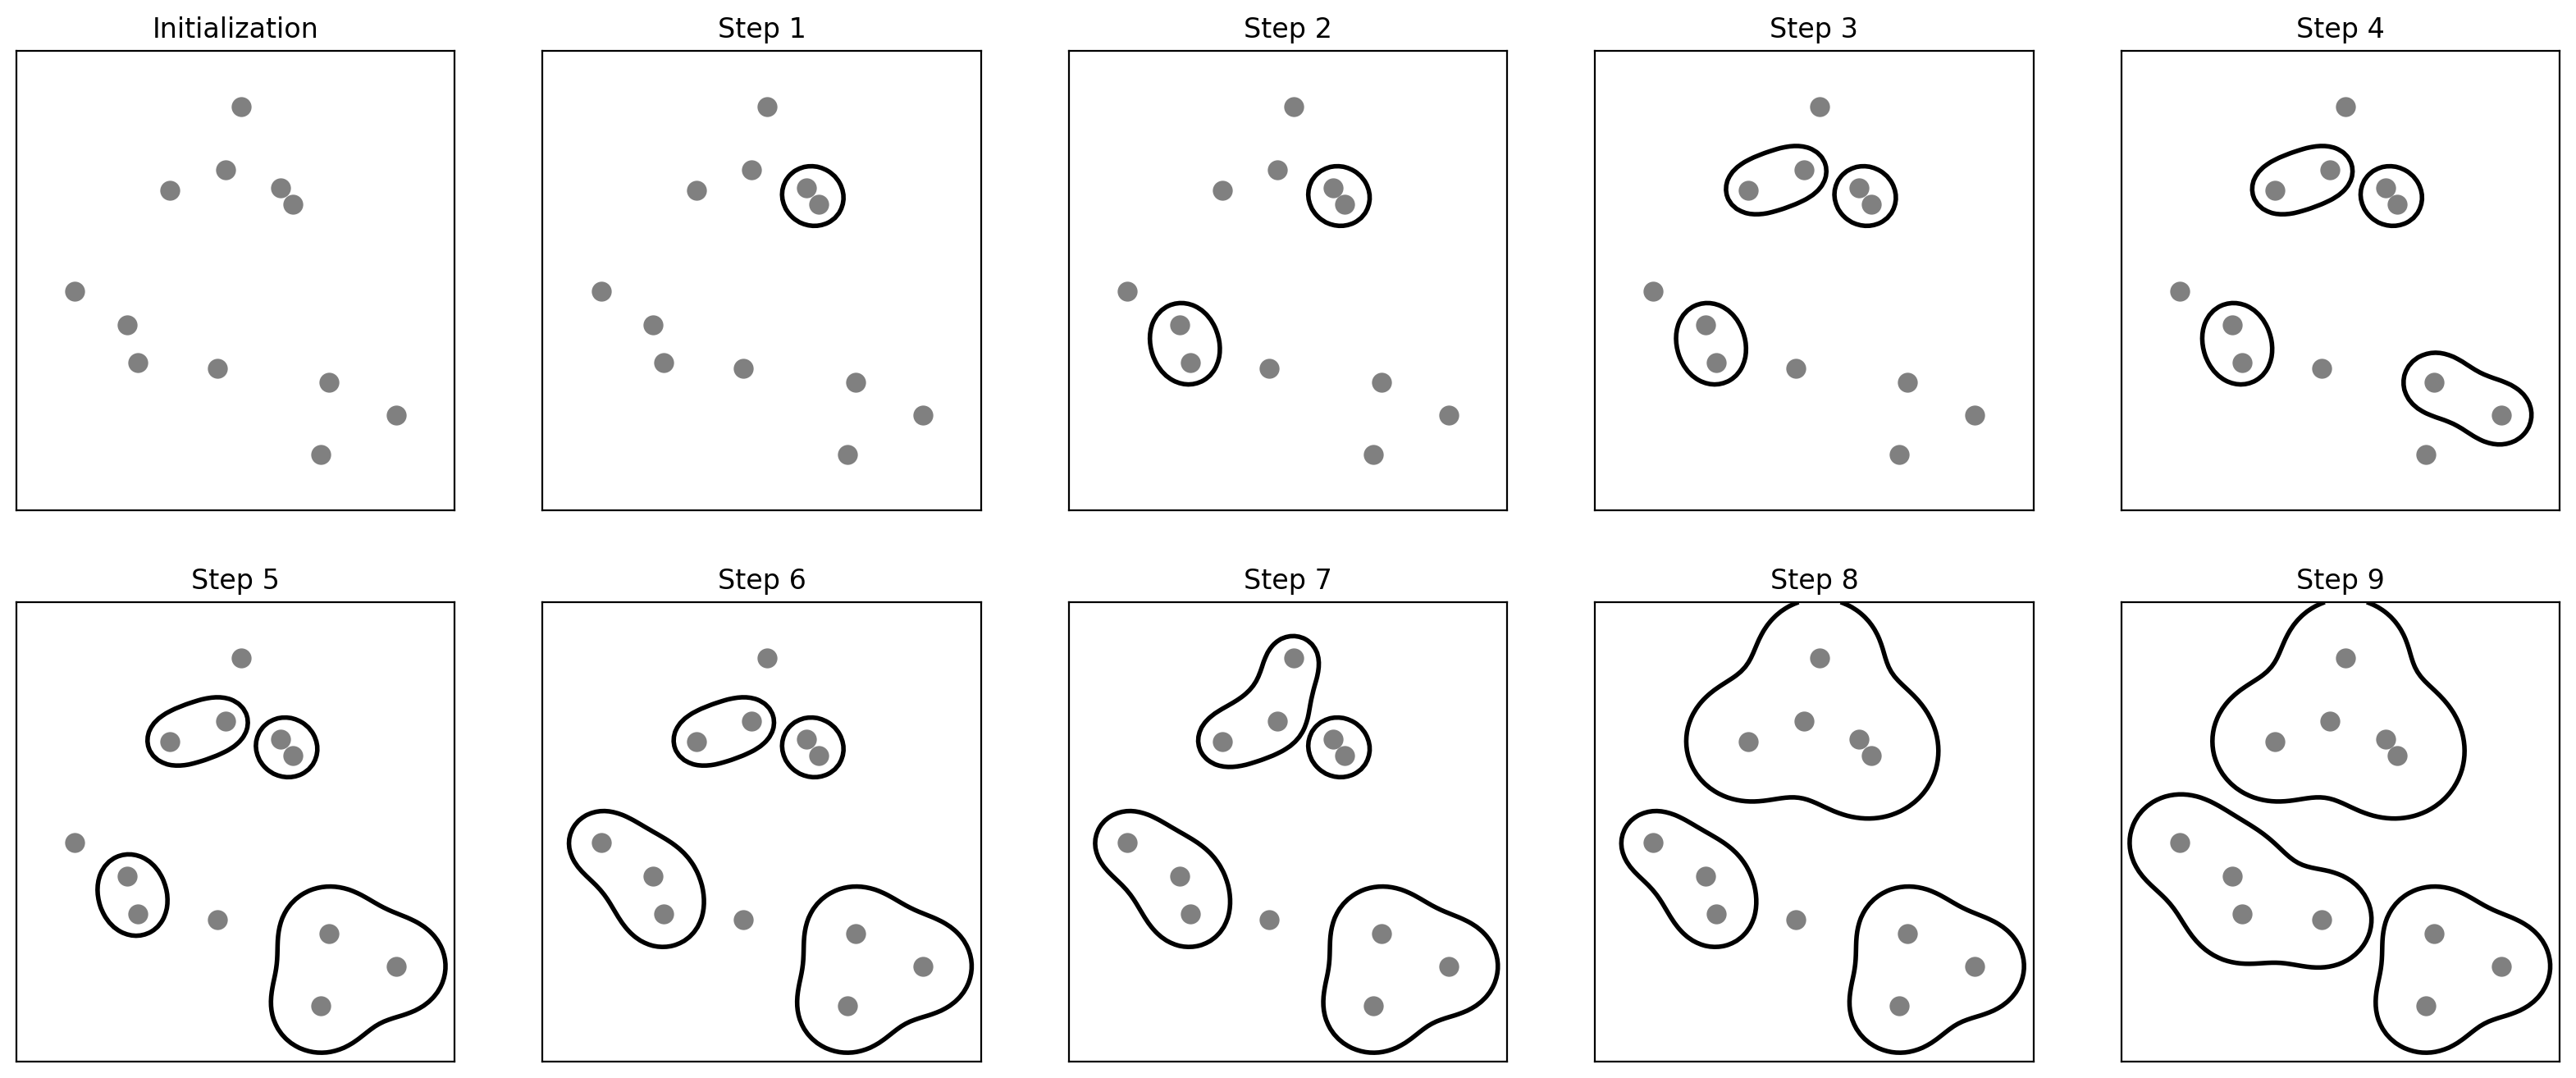

In [29]:
mglearn.plots.plot_agglomerative_algorithm()

In [30]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10).fit(x)
print_score(x,y,ac.labels_)

homogeneity: 0.8575128719504723
completeness: 0.8790955851724198
v_measure: 0.8681701126909083
--------------------------------------------------
silhouette: 0.17849659940596496


### DBSCAN
- 클러스터의 개수를 미리 지정할 필요 없음
- 밀도기반 클러스터링
- 데이터 샘플들이 몰려있는 지점을 찾아 묶어서 군집화
- 주요 파라미터
    - eps: 이웃으로 판단하는 최대거리
    - min_samples: 이웃 반경내 최소 샘플수

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


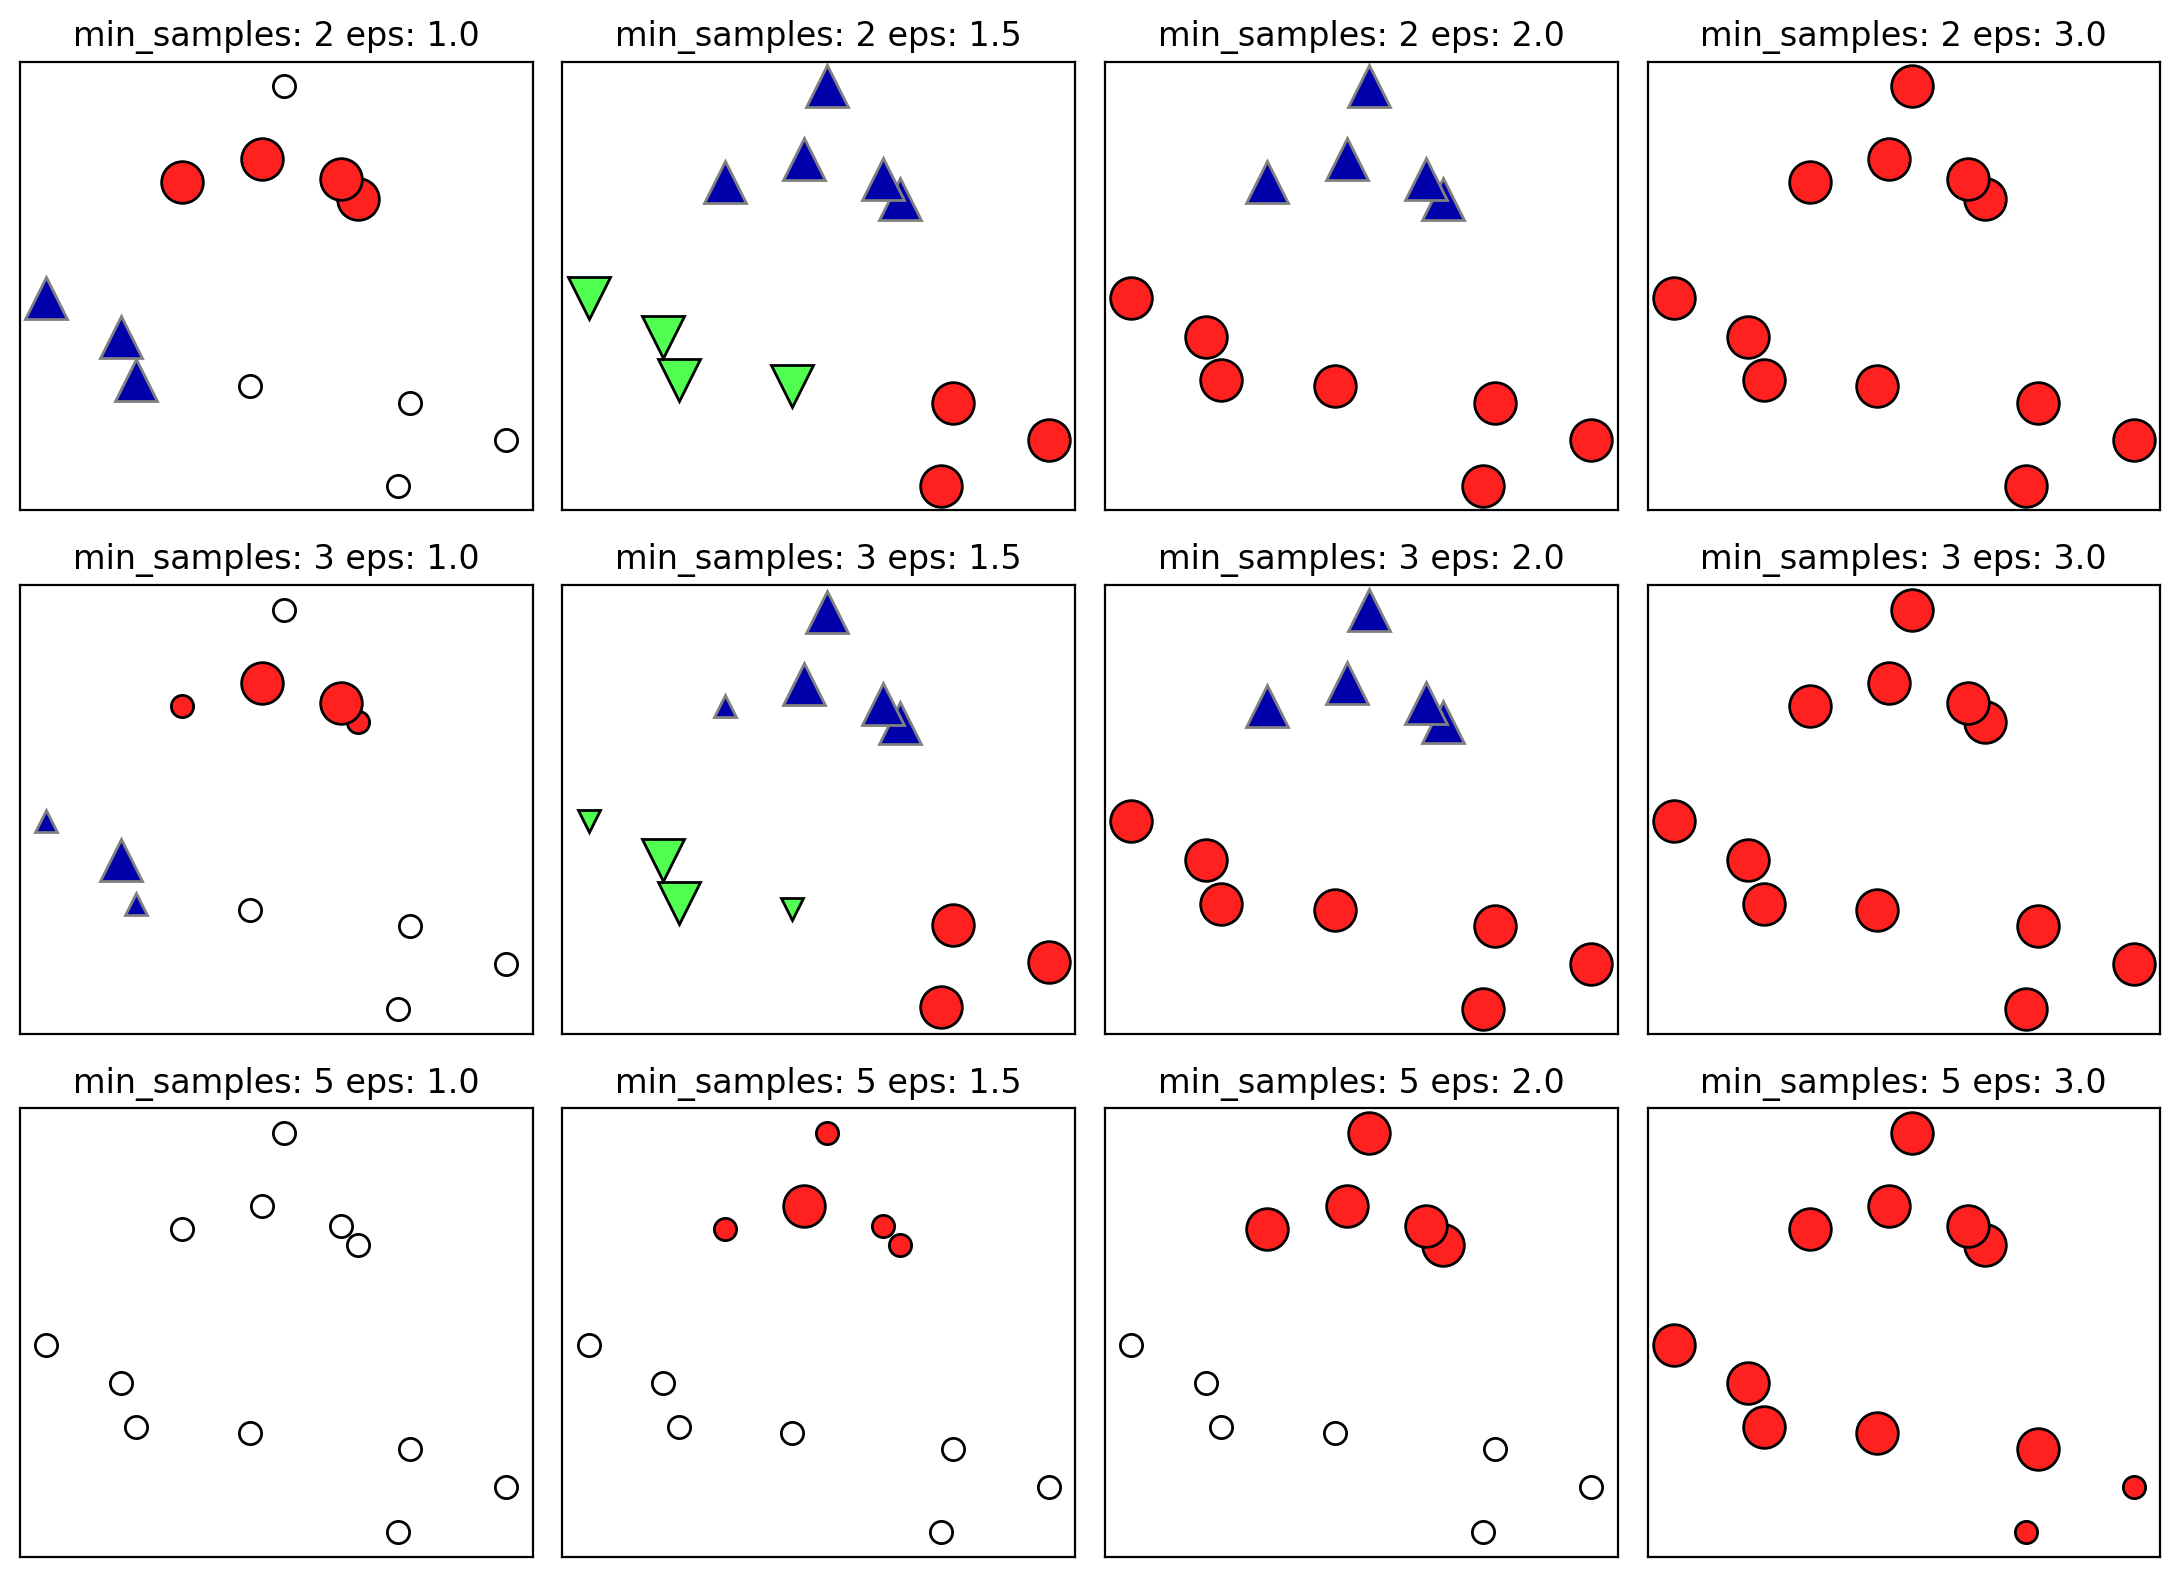

In [31]:
mglearn.plots.plot_dbscan()

상기 그래프에서 크러스터에 속한 포인트는 색을 칠하고 잡음 포인트는 하얀색으로 표현하였다.  
또한 핵심 포인트는 크게 표시하고, 경계 포인트는 작게 표현하였다.  
- eps를 증가시키면 클러스터를 거지게 하여 여러 클러스터를 합치게하는 효과가 있다.  
- min_samples를 증가시키면 핵심 포인트 수가 줄어들며 잡음 포인트가 늘어난다.  

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=3,eps=0.05,n_jobs=-1).fit(x)
print_score(x,y,dbscan.labels_)

homogeneity: 0.07120590002352155
completeness: 0.35826557533497766
v_measure: 0.11880007964616032
--------------------------------------------------
silhouette: -0.29235730958906886
